## Assignment Submitted By: Naveen Kumar ,9671833292

### Topic : EDA (Asssignment Number-07)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Load the dataset

In [2]:
file_path = "ipl.xlsx"
df = pd.read_excel(file_path, sheet_name="IPL_Dataset")

### Q1: Maximum matches played by a player

In [21]:
max_matches = df.loc[df['Matches'].idxmax(), ['Player', 'Matches']]
#print(max_matches)
max_matches

Player     Shikhar Dhawan
Matches                17
Name: 1, dtype: object

### Q2: Top 2 players with max average and at least 2 half-centuries


In [7]:
# Clean column names by stripping extra spaces
df.columns = df.columns.astype(str).str.strip()

# Filter players with at least 2 half-centuries
filtered_df = df[df['50'] >= 2]

# Sort by batting average in descending order and get the top 2 players
top_players = filtered_df.sort_values(by='Avg', ascending=False).head(2)

# Display the result
print(top_players[['Player', 'Avg', '50']])

             Player    Avg  50
36  Wriddhiman Saha  71.33   2
4      Ishan Kishan  57.33   4


### Q3. Create 2 new columns based on Player name. First column will have first name and second column will have last name.Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.

In [9]:
# Split the Player name into first and last name
df[['First Name', 'Last Name']] = df['Player'].str.split(n=1, expand=True)

# Display the updated DataFrame with new columns
print(df[['Player', 'First Name', 'Last Name']].head())

           Player First Name Last Name
0        KL Rahul         KL     Rahul
1  Shikhar Dhawan    Shikhar    Dhawan
2    David Warner      David    Warner
3    Shreyas Iyer    Shreyas      Iyer
4    Ishan Kishan      Ishan    Kishan


### Q4. Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.

In [11]:
# Remove asterisk (*) and convert to integer
df['Cleaned_Highest_score'] = df['Highest Score'].astype(str).str.replace('*', '', regex=False).astype(int)

# Display the updated DataFrame with the new column
print(df[['Player', 'Highest Score', 'Cleaned_Highest_score']].head())

           Player Highest Score  Cleaned_Highest_score
0        KL Rahul          132*                    132
1  Shikhar Dhawan          106*                    106
2    David Warner           85*                     85
3    Shreyas Iyer           88*                     88
4    Ishan Kishan            99                     99


### Q5. Print the total number of centuries scored in the entire season.

In [22]:
# Calculate the total number of centuries
total_centuries = df['100'].sum()

# Print the result
print(f"Total number of centuries scored in the season: {total_centuries}")

Total number of centuries scored in the season: 5


### Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season.Print the player name, his strike rate and average strike rate.

In [24]:
# Calculate the average strike rate of all players
average_strike_rate = df['Strike rate'].mean()

# Filter players with strike rate less than the average
low_strike_rate_players = df[df['Strike rate'] < average_strike_rate]

# Display the result
print("Players with strike rate less than the average strike rate:")
print(low_strike_rate_players[['Player', 'Strike rate']])
print(f"\nAverage Strike Rate of all players: {average_strike_rate:.2f}")

Players with strike rate less than the average strike rate:
                  Player  Strike rate
51        Ajinkya Rahane       105.60
55         Glenn Maxwell       101.88
58         Vijay Shankar       101.04
61         Josh Philippe       101.29
62       Gurkeerat Singh        88.75
65          Kedar Jadhav        93.93
70      Yashasvi Jaiswal        90.90
71         Shreyas Gopal        94.87
77          Murali Vijay        74.41
79          Chris Jordan        93.54
80         Navdeep Saini       100.00
82     Kamlesh Nagarkoti        70.96
84         Harshal Patel        87.50
85         Jimmy Neesham       105.55
86            Tom Banton        90.00
89     Prabhsimran Singh       100.00
92         Kuldeep Yadav        61.90
94             Moeen Ali        75.00
95        Sandeep Sharma        80.00
96        Shardul Thakur        57.14
98           Rinku Singh       100.00
99           Shivam Mavi        71.42
100  Varun Chakaravarthy        66.66
101       Jaydev Unadkat    

### Q7. Please check the correlation between the features and create a heat map.

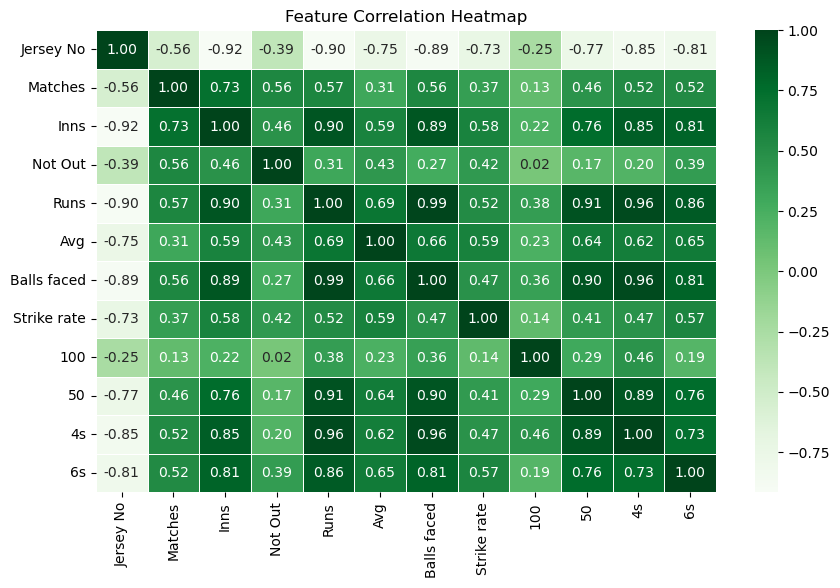

In [57]:
# Select only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with a green color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

###  Q. 8 Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.

In [30]:
# Filter players with an average > 50 and strike rate > 120
filtered_players = df[(df['Avg'] > 50) & (df['Strike rate'] > 120)]

# Display the result
print("Players with an average greater than 50 and a strike rate above 120:")
print(filtered_players[['Player', 'Avg', 'Strike rate']])

Players with an average greater than 50 and a strike rate above 120:
             Player     Avg  Strike rate
0          KL Rahul   55.83       129.34
4      Ishan Kishan   57.33       145.76
31   Kieron Pollard   53.60       191.42
36  Wriddhiman Saha   71.33       139.86
37  Ruturaj Gaikwad   51.00       120.71
57     Deepak Hooda  101.00       142.25
60       Tom Curran   83.00       133.87


### Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.

In [34]:
# Filter players with an average > 40 and balls faced > 100
filtered_players = df[(df['Avg'] > 40) & (df['Balls faced'] > 100)]

# Display the result
print("Players with an average greater than 40 and balls faced above 100:")
print(filtered_players[['Player', 'Avg', 'Balls faced']])

Players with an average greater than 40 and balls faced above 100:
             Player    Avg  Balls faced
0          KL Rahul  55.83          518
1    Shikhar Dhawan  44.14          427
4      Ishan Kishan  57.33          354
8       Virat Kohli  42.36          384
9      ABD Villiers  45.40          286
10    Faf Duplessis  40.81          319
14      Eoin Morgan  41.80          302
24  Kane Williamson  45.28          237
27      Chris Gayle  41.14          210
28       Ben Stokes  40.71          200
31   Kieron Pollard  53.60          140
32    Rahul Tewatia  42.50          183
33  Ravindra Jadeja  46.40          135
36  Wriddhiman Saha  71.33          153
37  Ruturaj Gaikwad  51.00          169


### Q10. Players who scored atleast one century in this season. Create visualization.

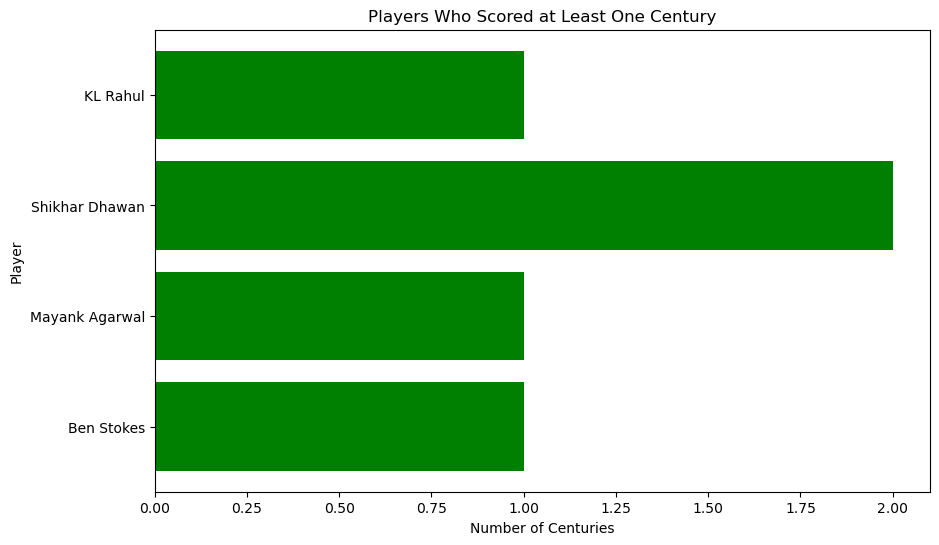

In [69]:
# Ensure correct column name usage
century_column = [col for col in df.columns if str(col).strip() == "100"][0]  # Find the correct column name

# Filter players who scored at least one century
century_scorers = df[df[century_column] >= 1]

plt.figure(figsize=(10, 6))
plt.barh(century_scorers["Player"], century_scorers[century_column], color="green")  # Green bars
plt.xlabel("Number of Centuries")
plt.ylabel("Player")
plt.title("Players Who Scored at Least One Century")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Q11. Players who scored atleast 4 half centuries in this season.

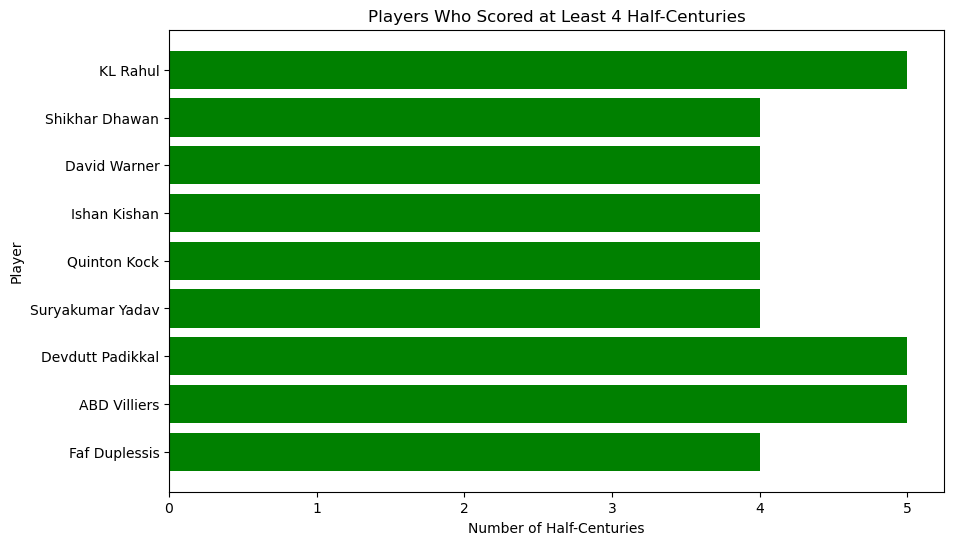

In [40]:
# Ensure correct column name usage
half_century_column = [col for col in df.columns if str(col).strip() == "50"][0]  # Find the correct column name

# Filter players who scored at least 4 half-centuries
half_century_scorers = df[df[half_century_column] >= 4]

# Plot the data for half-centuries
plt.figure(figsize=(10, 6))
plt.barh(half_century_scorers["Player"], half_century_scorers[half_century_column], color="green")
plt.xlabel("Number of Half-Centuries")
plt.ylabel("Player")
plt.title("Players Who Scored at Least 4 Half-Centuries")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.

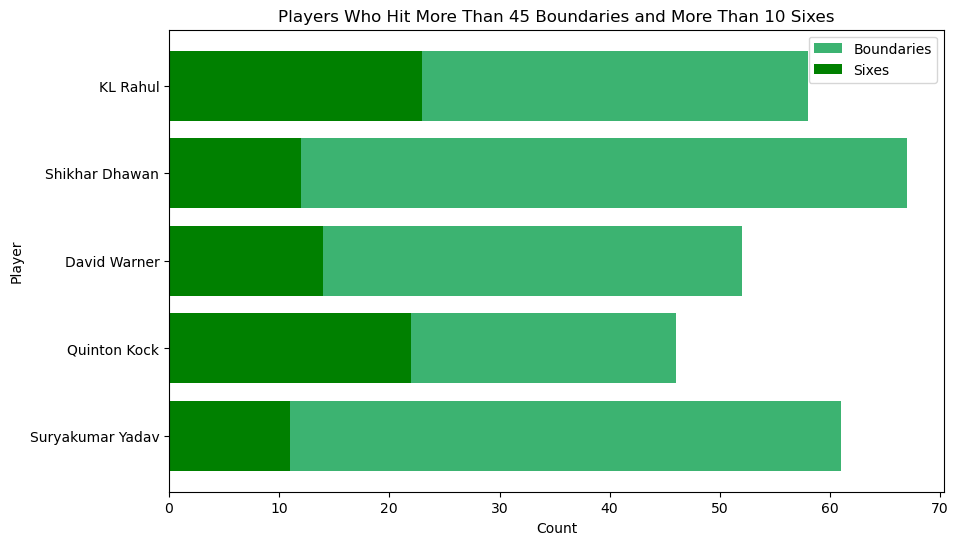

In [79]:
# Ensure correct column name usage
boundaries_column = [col for col in df.columns if str(col).strip() == "4s"][0]  # Find the correct column name
sixes_column = [col for col in df.columns if str(col).strip() == "6s"][0]  # Find the correct column name

# Filter players who hit more than 45 boundaries and more than 10 sixes
boundary_six_hitters = df[(df[boundaries_column] > 45) & (df[sixes_column] > 10)]

# Plot the data for boundaries and sixes
plt.figure(figsize=(10, 6))
plt.barh(boundary_six_hitters["Player"], boundary_six_hitters[boundaries_column], color="mediumseagreen", label="Boundaries")
plt.barh(boundary_six_hitters["Player"], boundary_six_hitters[sixes_column], color="green", label="Sixes")
plt.xlabel("Count")
plt.ylabel("Player")
plt.title("Players Who Hit More Than 45 Boundaries and More Than 10 Sixes")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


### Q13. Plot a histogram of number of matches played in a season by players.

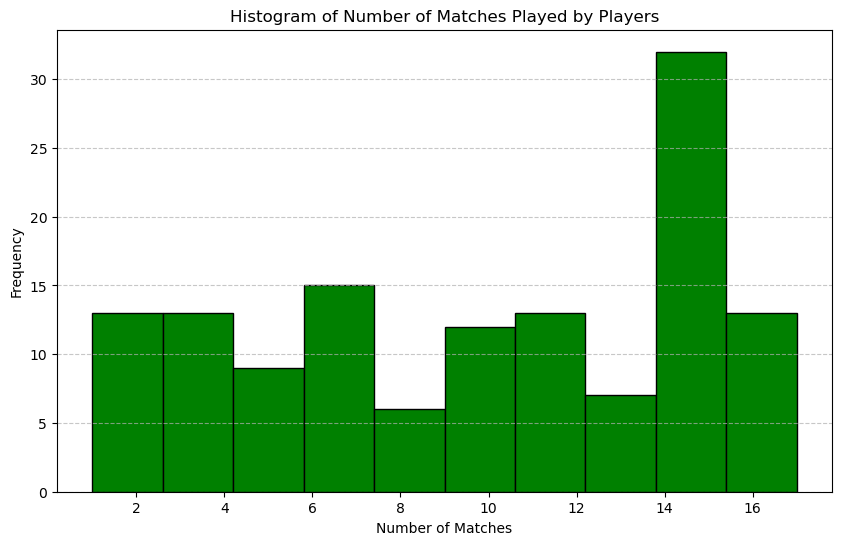

In [46]:
# Ensure correct column name usage
matches_column = [col for col in df.columns if str(col).strip() == "Matches"][0]  # Find the correct column name

# Plot histogram for number of matches played
plt.figure(figsize=(10, 6))
plt.hist(df[matches_column], bins=10, color="green", edgecolor="black")
plt.xlabel("Number of Matches")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Matches Played by Players")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Q14. Plot the histogram of balls faced by players.

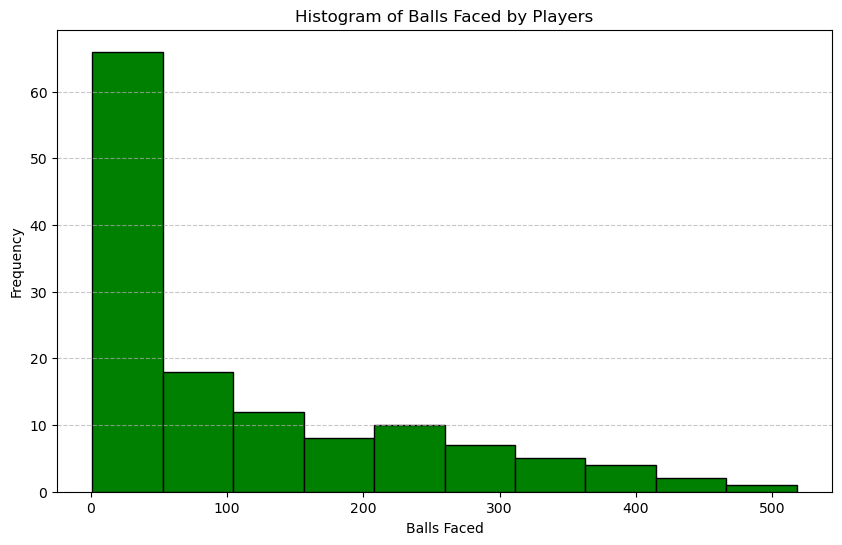

In [51]:
# Identify the correct column for balls faced
balls_faced_column = [col for col in df.columns if "Ball" in str(col)].pop()  # Adjust for variations

# Plot histogram for balls faced by players
plt.figure(figsize=(10, 6))
plt.hist(df[balls_faced_column], bins=10, color="green", edgecolor="black")
plt.xlabel("Balls Faced")
plt.ylabel("Frequency")
plt.title("Histogram of Balls Faced by Players")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Q15. Top 10 players with most runs in a season.

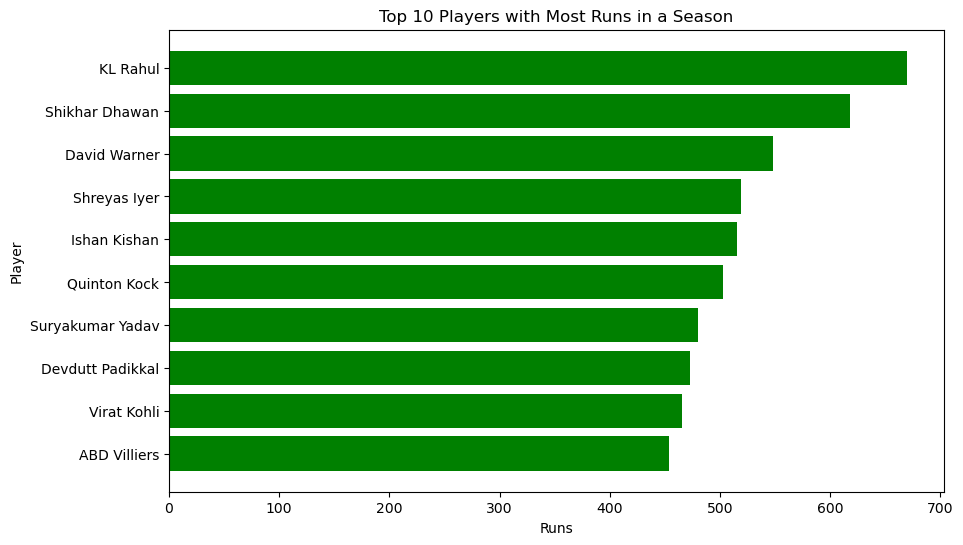

In [53]:
# Identify the correct column for runs
runs_column = [col for col in df.columns if "Run" in str(col)].pop()  # Adjust for variations

# Get top 10 players with most runs in a season
top_scorers = df.nlargest(10, runs_column)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(top_scorers["Player"], top_scorers[runs_column], color="green")
plt.xlabel("Runs")
plt.ylabel("Player")
plt.title("Top 10 Players with Most Runs in a Season")
plt.gca().invert_yaxis()
plt.show()

### Q16. Print the players who played the match but didn't get the batting.

In [25]:
# Identify the correct columns for matches played and balls faced
matches_column = [col for col in df.columns if "Match" in str(col)].pop()  # Adjust for variations
balls_faced_column = [col for col in df.columns if "Ball" in str(col)].pop()  # Adjust for variations

# Ensure 'Balls Faced' column has valid numeric values
df[balls_faced_column] = pd.to_numeric(df[balls_faced_column], errors='coerce')

# Filter players who played matches but didn't get to bat (balls faced is NaN or 0)
players_no_batting = df[(df[matches_column] > 0) & (df[balls_faced_column].isna() | (df[balls_faced_column] == 0))]

# Print the players
print("Players who played but didn't get to bat:")
print(players_no_batting["Player"].to_string(index=False))


Players who played but didn't get to bat:
Series([], )


### Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.

In [27]:
# Identify the correct columns for runs, fours, and sixes
runs_column = [col for col in df.columns if "Run" in str(col)].pop()
fours_column = [col for col in df.columns if "4s" in str(col)].pop()
sixes_column = [col for col in df.columns if "6s" in str(col)].pop()

# Calculate the total runs scored from fours and sixes
df["Boundary Runs"] = (df[fours_column] * 4) + (df[sixes_column] * 6)

# Calculate the percentage of total runs from boundaries
df["Boundary Percentage"] = (df["Boundary Runs"] / df[runs_column]) * 100

# Handle cases where total runs are zero to avoid division errors
df["Boundary Percentage"] = df["Boundary Percentage"].fillna(0)

# Get top 5 players with the highest boundary percentage
top_5_players = df.nlargest(5, "Boundary Percentage")

# Print the result
print("Top 5 players with the highest percentage of runs from boundaries:")
print(top_5_players[["Player", "Boundary Percentage"]].to_string(index=False))

Top 5 players with the highest percentage of runs from boundaries:
       Player  Boundary Percentage
   Andrew Tye           100.000000
Andre Russell            76.923077
 Chris Morris            76.470588
Hardik Pandya            73.309609
 Sunil Narine            72.727273


### Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).

In [29]:
# Identify the correct columns for Not Outs and Innings
not_outs_column = [col for col in df.columns if "Not Out" in str(col)].pop()
innings_column = [col for col in df.columns if "Inns" in str(col)].pop()

# Calculate Not Out percentage
df["Not Out Percentage"] = (df[not_outs_column] / df[innings_column]) * 100

# Handle cases where innings are zero to avoid division errors
df["Not Out Percentage"] = df["Not Out Percentage"].fillna(0)

# Get top 5 players with the highest Not Out percentage
top_5_not_outs = df.nlargest(5, "Not Out Percentage")

# Print the result
print("Top 5 players with the highest Not Out percentage:")
print(top_5_not_outs[["Player", "Not Out Percentage"]].to_string(index=False))


Top 5 players with the highest Not Out percentage:
         Player  Not Out Percentage
Gurkeerat Singh               100.0
Lockie Ferguson               100.0
    Imran Tahir               100.0
  Mohammad Nabi               100.0
   Pravin Dubey               100.0


### Q19. Create visualization of top 10 players with highest number of sixes.

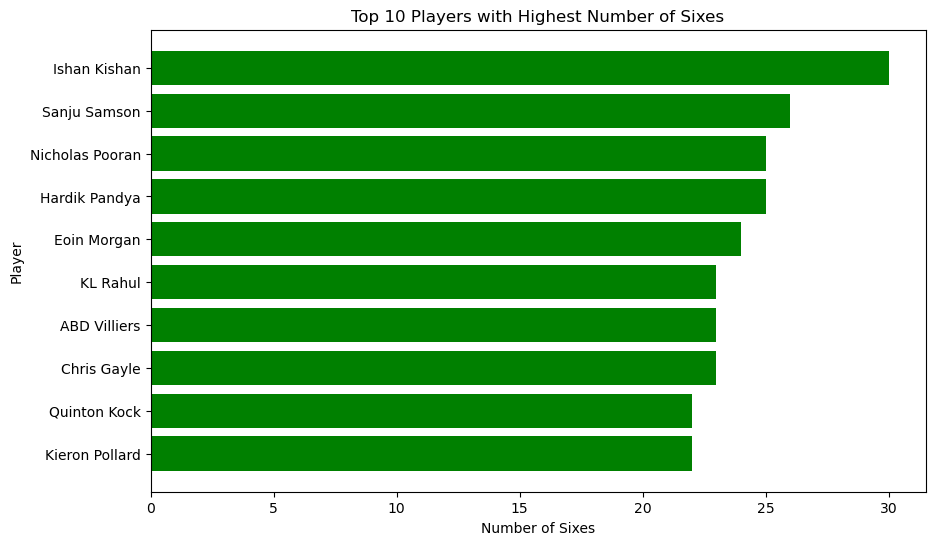

In [35]:
# Identify the correct column for sixes
sixes_column = next((col for col in df.columns if "6s" in str(col)), None)

# Ensure the column exists before proceeding
if sixes_column is None:
    print("Error: Column for Sixes not found. Please check the dataset.")
else:
    # Get top 10 players with the highest number of sixes
    top_10_six_hitters = df.nlargest(10, sixes_column)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_six_hitters["Player"], top_10_six_hitters[sixes_column], color="green")
    plt.xlabel("Number of Sixes")
    plt.ylabel("Player")
    plt.title("Top 10 Players with Highest Number of Sixes")
    plt.gca().invert_yaxis()
    plt.show()


### Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.

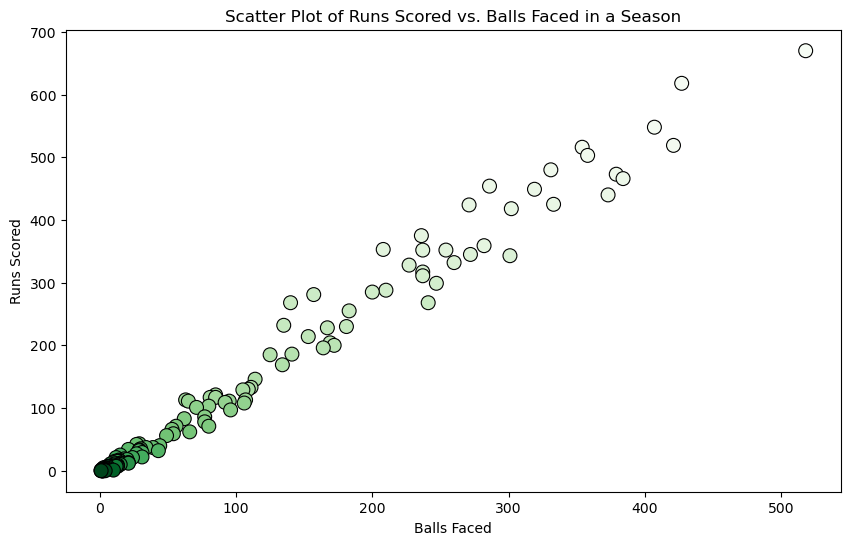

Pearson Correlation Coefficient: 0.99
There is a statistically significant positive correlation between runs scored and balls faced.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the Excel file
file_path = "ipl.xlsx"
df = pd.read_excel(file_path, sheet_name="IPL_Dataset")

# Scatter plot of Runs vs. Balls faced
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Balls faced"], y=df["Runs"], hue=df["Player"], palette="Greens", s=100, edgecolor="black")

# Labels and title
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.title("Scatter Plot of Runs Scored vs. Balls Faced in a Season")
plt.legend([], [], frameon=False)  # Hide the legend for better visibility

# Show plot
plt.show()

# Compute Pearson correlation coefficient
correlation, p_value = pearsonr(df["Balls faced"], df["Runs"])

# Print correlation result
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
if p_value < 0.05:
    print("There is a statistically significant positive correlation between runs scored and balls faced.")
else:
    print("The correlation is not statistically significant.")
